### Importing Necessary Modules

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Generating Random Data

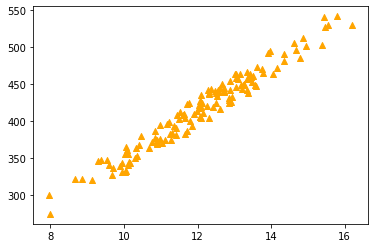

In [14]:
np.random.seed(4)

area_of_property = 1.7 * np.random.randn(140) + 12
price_in_dollars = 32 * area_of_property + np.random.randint(10, 50, size=len(area_of_property))

housing_data = np.array([area_of_property, price_in_dollars])
data = pd.DataFrame(data=housing_data.T, columns=["area", "price"])

plt.scatter(data["area"], data["price"], marker='^' ,c="orange")
plt.show()

### Regression Coefficients 

In [17]:
W = sum(price_in_dollars*(area_of_property-np.mean(area_of_property)))/sum((area_of_property-np.mean(area_of_property))**2)
b = np.mean(price_in_dollars) - W*np.mean(area_of_property)

print("The Regression coefficients are : W ={}, b={}".format(W,b))

The Regression coefficients are : W =31.631422138295946, b=34.27661161472088


### Predicting And Plotting  

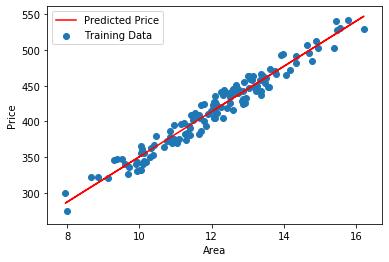

In [19]:
y_predict = W * area_of_property + b

plt.plot(area_of_property, y_predict, color='red', label="Predicted Price")
plt.scatter(data["area"], data["price"], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")

plt.legend()


### Estimator API


In [20]:
import tensorflow as tf
from tensorflow import feature_column as fc
numeric_column = fc.numeric_column
ccwcl = fc.categorical_column_with_vocabulary_list

### Definning The Feature Columns


In [21]:
feature_columns = [ tf.feature_column.numeric_column("area"),
                   tf.feature_column.categorical_column_with_vocabulary_list("type", ["bungalow", "apartment"])
]

In [23]:
def train_input_function():
    features = {"area" : [1000, 2000, 3000, 1000, 2500, 5000],
               "type": ["bungalow", "bungalow", "bungalow", "apartment", "house", "apartment"]}
    labels = [500, 1000, 1500, 650, 1200, 2300]
    
    return features, labels


In [24]:
model = tf.estimator.LinearRegressor(feature_columns)
model.train(train_input_function, steps=200)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\KARTIK~1\\AppData\\Local\\Temp\\tmp6g5h2z6_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constraint arguments to layers

In [25]:
def predicit_input_function():
    features = {"area":[1500, 1800],
               "type":["house", "apartment"]}
    return features

In [27]:
predictions = model.predict(predicit_input_function)

print(next(predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\KARTIK~1\AppData\Local\Temp\tmp6g5h2z6_\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'predictions': array([718.5236], dtype=float32)}


In [28]:
print(next(predictions))

{'predictions': array([863.2187], dtype=float32)}


### Boston Housing DataSet 

In [29]:
from tensorflow.keras.datasets import boston_housing


In [30]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 2s 37us/step


In [48]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM','AGE',
            'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [50]:
X_train_df = pd.DataFrame(X_train, columns=features)
X_train_df = X_train_df['CRIM', 'ZN', 'INDUS', 'CHAS', "NOX", 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_test_df = pd.DataFrame(X_test, columns=features)
y_train_df = pd.DataFrame(y_train, columns=['MEDv'])
y_test_df = pd.DataFrame(y_test, columns=['MEDV'])
X_train_df.head()

KeyError: ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')

In [38]:
feature_columns = []
for feature in features:
    feature_columns.append(fc.numeric_column(feature, dtype=tf.float32))


def outer_input_function(df_data, df_label, epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(df_data), df_label))
        if shuffle:
            ds = ds.shuffle(100)
            ds = ds.batch(batch_size).repeat(epochs)
        return ds
    return input_function


In [40]:
train_input_fn = outer_input_function(X_train_df, y_train_df)
val_input_fn = outer_input_function(X_test_df, y_test_df, epochs=1, shuffle=False)

linear_estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns)
linear_estimator.train(train_input_fn, steps=100)
# results = linear_estimator.evaluate(val_input_fn)



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\KARTIK~1\\AppData\\Local\\Temp\\tmpmuzcc06z', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32

In [41]:
result = linear_estimator.predict(val_input_fn)
for pred, exp in zip(result, y_test[:32]):
    print("Predicted value : ", pred['predictions'][0], "Expected value: ",exp)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



ValueError: in converted code:

    d:\kcconda\envs\tf_env\lib\site-packages\tensorflow_core\python\feature_column\feature_column_v2.py:706 call
        return self.layer(features)
    d:\kcconda\envs\tf_env\lib\site-packages\tensorflow_core\python\feature_column\feature_column_v2.py:540 call
        weight_var=weight_var)
    d:\kcconda\envs\tf_env\lib\site-packages\tensorflow_core\python\feature_column\feature_column_v2.py:2418 _create_weighted_sum
        weight_var=weight_var)
    d:\kcconda\envs\tf_env\lib\site-packages\tensorflow_core\python\feature_column\feature_column_v2.py:2424 _create_dense_column_weighted_sum
        tensor = column.get_dense_tensor(transformation_cache, state_manager)
    d:\kcconda\envs\tf_env\lib\site-packages\tensorflow_core\python\feature_column\feature_column_v2.py:2852 get_dense_tensor
        return transformation_cache.get(self, state_manager)
    d:\kcconda\envs\tf_env\lib\site-packages\tensorflow_core\python\feature_column\feature_column_v2.py:2615 get
        transformed = column.transform_feature(self, state_manager)
    d:\kcconda\envs\tf_env\lib\site-packages\tensorflow_core\python\feature_column\feature_column_v2.py:2824 transform_feature
        input_tensor = transformation_cache.get(self.key, state_manager)
    d:\kcconda\envs\tf_env\lib\site-packages\tensorflow_core\python\feature_column\feature_column_v2.py:2602 get
        feature_tensor = self._get_raw_feature_as_tensor(key)
    d:\kcconda\envs\tf_env\lib\site-packages\tensorflow_core\python\feature_column\feature_column_v2.py:2656 _get_raw_feature_as_tensor
        key, feature_tensor))

    ValueError: Feature (key: AGE) cannot have rank 0. Given: Tensor("linear/linear_model/Cast:0", shape=(), dtype=float32)
